In [1]:
#QNT 755 Final Project - Summer 2022
    #Alyssa Griswold
    #Alicia Maffiolini
    #Steve Marsella
    #Jerrod Wike

from zipfile import ZipFile
  
# specifying the zip file name
file_name = "archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
CA_category_id.json                            2019-09-21 19:56:58         7911
CAvideos.csv                                   2019-09-21 19:56:58     64067991
DE_category_id.json                            2019-09-21 19:57:14         7911
DEvideos.csv                                   2019-09-21 19:57:16     63040138
FR_category_id.json                            2019-09-21 19:57:26         7911
FRvideos.csv                                   2019-09-21 19:57:26     51424708
GB_category_id.json                            2019-09-21 19:57:34         8225
GBvideos.csv                                   2019-09-21 19:57:34     53213441
IN_category_id.json                            2019-09-21 19:57:40         8225
INvideos.csv                                   2019-09-21 19:57:40     59600439
JP_category_id.json                            2019-09-21 19:57:46         8225
JPvideos.csv                            

In [2]:
import pandas as pd
import numpy as np
#Reading the files
data1 = pd.read_csv('CAvideos.csv')
data2 = pd.read_csv('GBvideos.csv')
data3 = pd.read_csv('USvideos.csv')
#Converting to NumPy arrays
a1 = np.array(data1)
a2 = np.array(data2)
a3 = np.array(data3)
#Adding Column for country
aCA = np.insert(a1, 16, 'Canada', axis=1)
aGB = np.insert(a2, 16, 'Great Britain', axis=1)
aUS = np.insert(a3, 16, 'United States', axis=1)
#Concatenating arrays
Final = np.concatenate((aCA,aGB,aUS), axis=0)
#Sorting by column 4 'category_id', can sort by any column
Test = Final[Final[:, 4].argsort()]
#print(Test)

In [3]:
#Sum up views to day level
dv=Test[:, [1,7]]

date_views= dv[dv[:,0].argsort()]

d_sorted_arr= dv[dv[:,0].argsort()]

d_group_arr= np.split(d_sorted_arr[:,1:2], np.unique(d_sorted_arr[:,0], return_index= True)[1][1:])

d_sum_arr = [x.sum() for x in d_group_arr]

final_days = np.array(
    (
        np.unique(d_sorted_arr[:,0]),
        d_sum_arr
    )
)

x_final_days=final_days[:, final_days[-1,:].argsort()][:,::-1]

#top 10 views day
x_final_days=x_final_days[:,:10]
x_final_days

array([['18.26.05', '18.25.05', '18.23.05', '18.13.05', '18.09.05',
        '18.01.06', '18.22.05', '18.12.05', '18.24.05', '18.18.05'],
       [3390985241, 3320852521, 3255551741, 3221581559, 3208582145,
        3195970119, 3186517387, 3179295895, 3171315714, 3148615194]],
      dtype=object)

In [4]:
#Sum up to day level first 10 days in Dec 2017
d=Test[:, [1,7,8]]

d_sorted= d[d[:,0].argsort()]

d_group= np.split(d_sorted[:,1],np.unique(d_sorted[:,0], return_index= True)[1][1:])

d_sum = [x.sum() for x in d_group]

final_d = np.array(
    (
        np.unique(d_sorted[:,0]),
        d_sum
    )
)


d_final_day=final_d[:,:10]
d_day=d_final_day[0]
d_view=d_final_day[1]
d_day,d_view

(array(['17.01.12', '17.02.12', '17.03.12', '17.04.12', '17.05.12',
        '17.06.12', '17.07.12', '17.08.12', '17.09.12', '17.10.12'],
       dtype=object),
 array([968584518, 828716434, 954344730, 1068406309, 1124265914,
        1060455021, 1121479665, 1014201943, 1047871529, 1112952615],
       dtype=object))

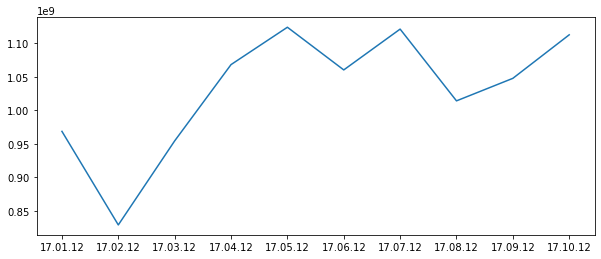

In [5]:
#Show first 10 days of Dec 2017 views
import pandas as pd
import matplotlib.pyplot as plt

xpoints = d_day
ypoints = d_view
plt.figure(1, figsize=(10, 4)) 

plt.plot(xpoints, ypoints)
plt.show()

In [6]:
#Sum up views for each video for all three countries 
#Create seperate array for titles and views
high_views=Test[:, [2,7]]

sorted_arr= high_views[high_views[:,0].argsort()]

group_arr= np.split(sorted_arr[:,1], np.unique(sorted_arr[:,0], return_index= True)[1][1:])

sum_arr = [x.sum() for x in group_arr]

final_views = np.array(
    (
        np.unique(sorted_arr[:,0]),
        sum_arr
    )
)

#sort highest first
x_final_arr=final_views[:, final_views[-1,:].argsort()][:,::-1]

#show top 5
x_final_arr[:,0:5]

#break up for title and views for visualization
title=x_final_arr[0]
views=x_final_arr[1]

#print top 5
title=title[0:5] 
views=views[0:5]

title, views

(array(['Childish Gambino - This Is America (Official Video)',
        'Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon',
        'Bad Bunny - Amorfoda | Video Oficial',
        'Ariana Grande - No Tears Left To Cry',
        'Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial'],
       dtype=object),
 array([10271573447, 8354526576, 6966183290, 5797542590, 5168434018],
       dtype=object))

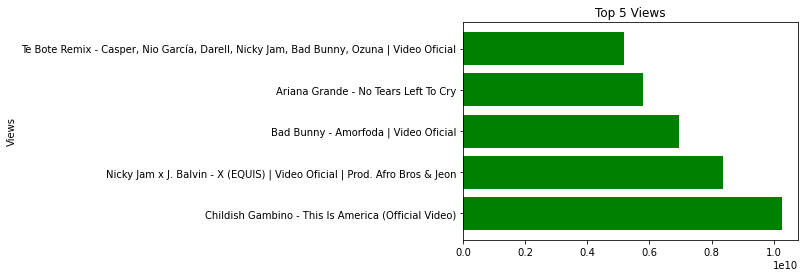

In [7]:
#Visualize top 5 likes total (US, GB and CA)

# Bar chart 
plt.barh(title, views,color='green')


plt.title("Top Videos")

# Setting the X and Y labels
plt.ylabel("Title")
plt.ylabel("Views") 
plt.title("Top 5 Views")
    
plt.show()

In [8]:
#Sum up views for each video for all three countries 
#Create array for countries and views
country_views=Test[:, [16,7]]

sorted_arr= country_views[country_views[:,0].argsort()]

group_arr= np.split(sorted_arr[:,1], np.unique(sorted_arr[:,0], return_index= True)[1][1:])

sum_arr = [x.sum() for x in group_arr]

final_arr = np.array(
    (
        np.unique(sorted_arr[:,0]),
        sum_arr
    )
)

#sort highest first
x_final_arr=final_arr[:, final_arr[-1,:].argsort()][:,::-1]

#show top 5
x_final_arr[:,0:5]

#break up for title and views for visualization
country=x_final_arr[0]
views=x_final_arr[1]

#print top 5
country=country[0:5] 
views=views[0:5]

country, views

(array(['Great Britain', 'United States', 'Canada'], dtype=object),
 array([230069198174, 96671770152, 46891975069], dtype=object))

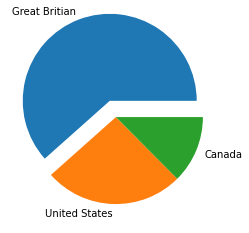

In [9]:
mylabels = ["Great Britian", "United States", "Canada"]
myexplode = [0.2, 0, 0]

plt.pie(views, labels = mylabels, explode = myexplode)
plt.show()

In [10]:
#Using dataframe for one example
import pandas as pd

df=pd.DataFrame(Test[:,[1,7,8]],columns = ['Date','Views','Likes'])
#Break up date int year, month and day
new=df[['Year', 'Day','Month']] = df['Date'].str.split('.', 2, expand=True)
new = df.groupby(['Year', 'Month']).sum().reset_index()

new=new.drop(columns=['Date', 'Day'])
#filter out 2017 keep 2018 first 6 months
new=new.loc[new['Year'] == '18']
new

,Year,Month,Views,Likes
2,18,01,24539647471,876144372
3,18,02,45884560276,1021192187
4,18,03,72842242603,1691088247
5,18,04,56278458815,1485563071
6,18,05,92064236145,2249774045
7,18,06,36881840268,1000345153


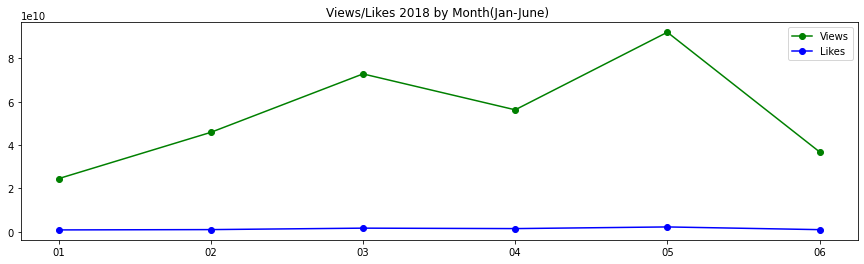

In [11]:
# Define data values
x = new['Month']
y = new['Views']
z = new['Likes']

plt.figure(1, figsize=(15, 4)) 

plt.plot(x, y,'o-g')
plt.plot(x, z, 'o-b')

# Plot another line on the same chart/graph
plt.title("Views/Likes 2018 by Month(Jan-June) ")
plt.legend(['Views', 'Likes'])
plt.show()

In [12]:
#find the video with the most views from each country
USmaxViews, CAmaxViews, GBmaxViews=0,0,0
USmaxVideo, CAmaxVideo, GBmaxVideo=Test[0][2], Test[0][2], Test[0][2]
for i in range(Test.shape[0]):
    if Test[i][16]=='United States':
        if Test[i][7]>USmaxViews:
            USmaxViews=Test[i][7]
            USmaxVideo=Test[i][2]
    if Test[i][16]=='Canada':
        if Test[i][7]>CAmaxViews:
            CAmaxViews=Test[i][7]
            CAmaxVideo=Test[i][2]
    if Test[i][16]=='Great Britain':
        if Test[i][7]>GBmaxViews:
            GBmaxViews=Test[i][7]
            GBmaxVideo=Test[i][2]
        
print('The video in the US with the most views is',USmaxVideo,'with',USmaxViews,'views.') 
print('The video in Canada with the most views is',CAmaxVideo,'with',CAmaxViews,'views.')
print('The video in Great Britain with the most views is',GBmaxVideo,'with',GBmaxViews,'views.') 

The video in the US with the most views is Childish Gambino - This Is America (Official Video) with 225211923 views.
The video in Canada with the most views is YouTube Rewind: The Shape of 2017 | #YouTubeRewind with 137843120 views.
The video in Great Britain with the most views is Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon with 424538912 views.


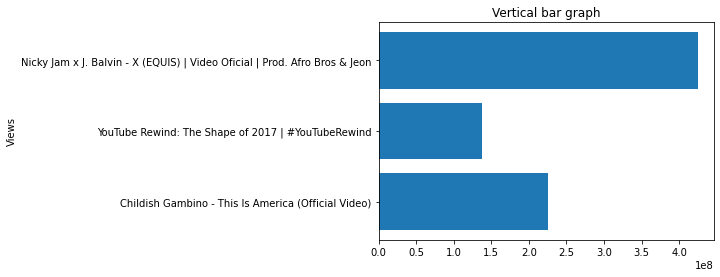

In [13]:
#Visualize top views for each country
titles =np.concatenate((USmaxVideo, CAmaxVideo,GBmaxVideo), axis=None)
views = np.concatenate((USmaxViews, CAmaxViews,GBmaxViews), axis=None)

  
# Bar chart 
plt.barh(titles, views)
  
plt.title("Top Videos")
  
# Setting the X and Y labels
plt.ylabel("Title")
plt.ylabel("Views") 
plt.title("Vertical bar graph")
plt.show()

In [14]:
#find video with the most likes
maxLikes=0
maxLikesVideo=Test[0][2]
for i in range(Test.shape[0]):
    if Test[i][8]>maxLikes:
        maxLikes=Test[i][8]
        maxLikesVideo=Test[i][2]

print('The video with the most likes is',maxLikesVideo,'with',maxLikes,'likes.')

The video with the most likes is BTS (방탄소년단) 'FAKE LOVE' Official MV with 5613827 likes.


In [15]:
#Decision Tree 1: Testing to see how accurate a decision tree model classified based on views, likes, and comment count can predict video category
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Setting the features and target
features1 = Test[: ,[7,8,10]] # views(7), likes(8), comment_count(10)
target1 = Test[: ,[4]] # category_id(4)
X = np.array(features1, dtype=np.float32)
y = np.array(target1, dtype=np.float32)

#Split into train and test data - 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Build decision tree 1
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)                
Y = clf.predict(X_test)               
print("Accuracy of Decision Tree 1:",metrics.accuracy_score(y_test, Y))

Accuracy of Decision Tree 1: 0.5119257950530035


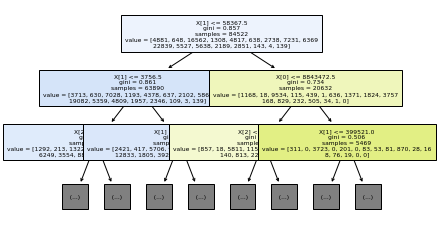

In [16]:
#Visualizing decsion tree 1
dt1 = tree.plot_tree(clf, max_depth=2, feature_names=None, class_names=None, label='all', filled=True, impurity=True, node_ids=False, proportion=False, fontsize='6')

In [17]:
#Decision Tree 2: - Adding in dislikes as a feature to see if this will improve the accuracy of the model
features2 = Test[: ,[7,8,9,10]] # views(7), likes(8), dislikes(9), comment_count(10)
target2 = Test[: ,[4]] # category_id(4)
X2 = np.array(features2, dtype=np.float32)
y2 = np.array(target2, dtype=np.float32)

#Split the dataset into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

#Build decision tree 2
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2_train,y2_train)                
Y2 = clf2.predict(X2_test)               
print("Accuracy of Decision Tree 2:",metrics.accuracy_score(y2_test, Y2))

Accuracy of Decision Tree 2: 0.5844191696113075


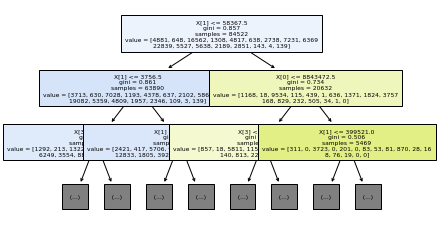

In [18]:
#Visualizing decision tree 2
dt2 = tree.plot_tree(clf2, max_depth=2, feature_names=None, class_names=None, label='all', filled=True, impurity=True, node_ids=False, proportion=False, fontsize='6')

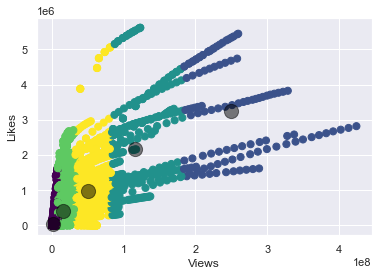

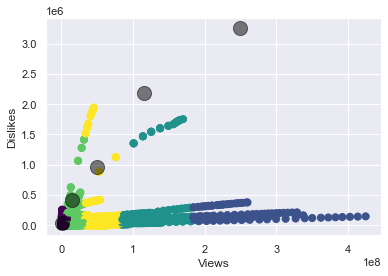

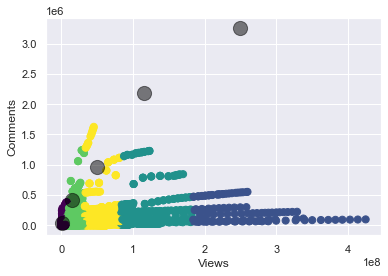

In [21]:
"""
K-Means Clustering Analysis
"""

from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

cluster_data = np.delete(Final,[0,1,2,3,4,5,6,11,12,13,14,15,16],axis=1)

kmeans = KMeans(5)
kmeans.fit(cluster_data)

clusters = kmeans.fit_predict(cluster_data)

#Plot Views vs Likes
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

#Plot Views vs Dislikes
plt.scatter(cluster_data[:, 0], cluster_data[:, 2], c=clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Views')
plt.ylabel('Dislikes')
plt.show()

#Plot Views vs Number of Comments
plt.scatter(cluster_data[:, 0], cluster_data[:, 3], c=clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Views')
plt.ylabel('Comments')
plt.show()